# Task 2

---

## Predictive modeling of customer bookings



### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [17]:
# Import the necessary libraries
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For the predictive modeling technique
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load your dataset into a pandas DataFrame
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [6]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.


### Feature Selection and Engineering
#### Select relevant features: 
Identify features that have a significant impact on the target variable and remove irrelevant ones.
<!---## Or### Create new features: 
Generate new features by combining or transforming existing ones if it adds meaningful information.--->

In our case possible relevant features are the following:
1. flight_duration
2. num_passengers
3. length_of_stay
4. trip_type
5. purchase_lead

Our target variable is 

- booking_complete (0 or 1)

In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(exclude=["object"])

numeric_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0
49996,1,111,6,4,7,0,0,0,5.62,0
49997,1,24,6,22,6,0,0,1,5.62,0
49998,1,15,6,11,1,1,0,1,5.62,0


In [9]:
# We now have 10 column in the new dataset
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [10]:
numeric_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


#### Addressing Multicollinearity

Check for multicollinearity (high correlation) between features and decide whether to remove, combine, or keep correlated features.

#### Calculate Correlation Matrix:
Calculate the correlation matrix of the features using the `.corr()` method. This will create a matrix of correlation coefficients between all pairs of features.

In [12]:
correlation_matrix = numeric_data.corr()

                       num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.212606       -0.115850   
purchase_lead                0.212606       1.000000       -0.076560   
length_of_stay              -0.115850      -0.076560        1.000000   
flight_hour                  0.015607       0.035973       -0.024872   
flight_day                   0.015407       0.036531       -0.000310   
wants_extra_baggage          0.120404      -0.022207        0.176757   
wants_preferred_seat         0.028544      -0.004499        0.032264   
wants_in_flight_meals        0.022943      -0.022653        0.098828   
flight_duration             -0.063169       0.067866        0.141181   
booking_complete             0.024116      -0.022131       -0.042408   

                       flight_hour  flight_day  wants_extra_baggage  \
num_passengers            0.015607    0.015407             0.120404   
purchase_lead             0.035973    0.036531            -0.0222

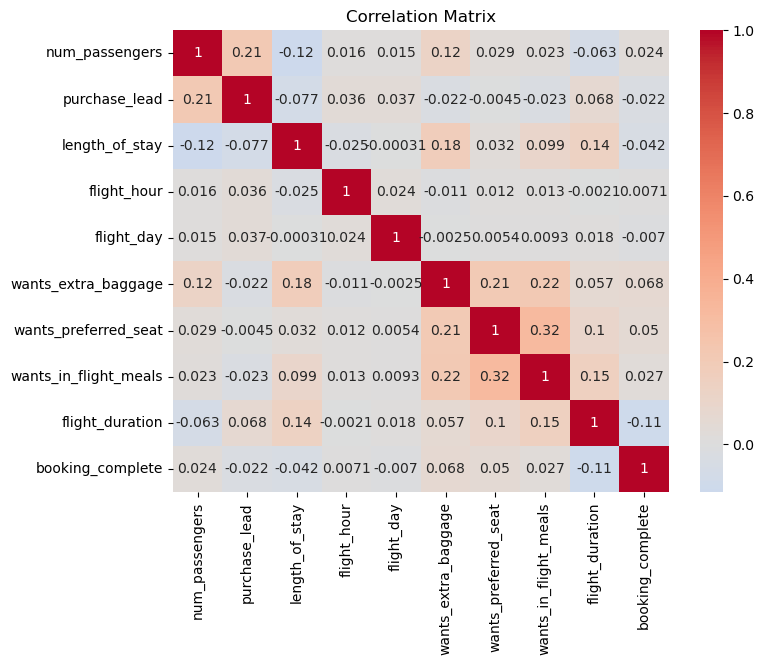

In [13]:
print(correlation_matrix)

# Heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

Correlation coefficients range from -1 to 1, with values closer to 1 indicating a strong positive correlation, values closer to -1 indicating a strong negative correlation, and values close to 0 indicating little to no correlation.

### Model Selection and Training

#### Splitting the Dataset

Divide the dataset into training, validation, and test sets. A common split is 70-15-15 or 80-10-10.
\
The training set is used to train the model, the validation set is used for tuning hyperparameters, and the test set is used to evaluate the final model's performance.

In this project, we're using the `train_test_split` function from the sklearn.model_selection module to perform the dataset splitting. You can adjust the test_size parameter to control the size of the validation and test sets. The random_state parameter is set to ensure reproducibility of the splits.

In [15]:
# Define your features (X) and target (y)
X = numeric_data.drop("booking_complete", axis=1)
y = numeric_data["booking_complete"]

In [16]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#### Train the Random Forest Model

In [18]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Validate the model on the validation data
val_predictions = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.84


In [20]:
# Test the model on the test data
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.85


### Interpretation of Results: Feature Importance
The technique is used to determine the contribution of individual input features (variables) in making predictions.

#### Access Feature Importance: 
Random Forest models provide a feature importance score for each input feature. You can access these scores using the feature_importances_ attribute of the trained model.

In [21]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

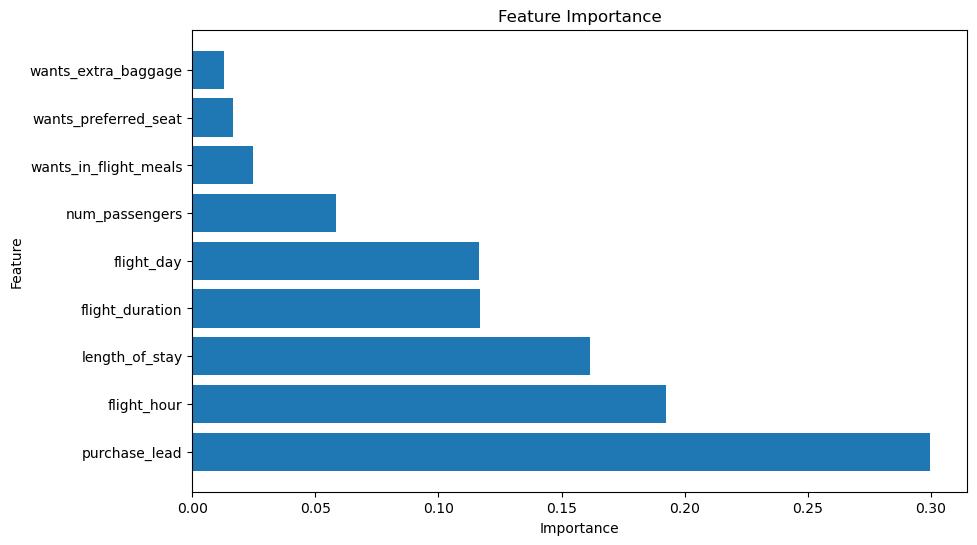

In [22]:
# Visualization
# Plot feature importances using a bar chat
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

We see that the features 'purchace_lead', 'flight_hour' and 'length_of_stay' are with higher scores and are considered more important in making predictions.

## Can we do better?

### Feature Selection: 
Based on the feature importance scores, we can decide whether to keep all features or select a subset of the most important ones. Removing less important features can simplify the model and potentially improve its performance or reduce overfitting.